In [3]:
import neo4j
import osmnx as ox
import geopy.distance

In [4]:
G = ox.load_graphml("./data/krakow.graphml")

In [5]:
print(G)

MultiDiGraph with 333120 nodes and 721628 edges


In [6]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,street_count,highway,ref,geometry
0,13822575,50.082051,20.032569,4,NaN,NaN,POINT (20.03257 50.08205)
1,13822576,50.080695,20.034350,3,NaN,NaN,POINT (20.03435 50.08069)
2,13822577,50.079400,20.036068,3,NaN,NaN,POINT (20.03607 50.07940)
3,13822581,50.081723,20.036520,2,NaN,NaN,POINT (20.03652 50.08172)
4,13822694,50.081361,20.035596,4,NaN,NaN,POINT (20.03560 50.08136)
...,...,...,...,...,...,...,...
333115,11286442324,50.063331,19.960819,3,NaN,NaN,POINT (19.96082 50.06333)
333116,11286442325,50.063072,19.961152,2,NaN,NaN,POINT (19.96115 50.06307)
333117,11286442326,50.063120,19.960761,3,NaN,NaN,POINT (19.96076 50.06312)
333118,11286442327,50.063135,19.961028,2,NaN,NaN,POINT (19.96103 50.06314)


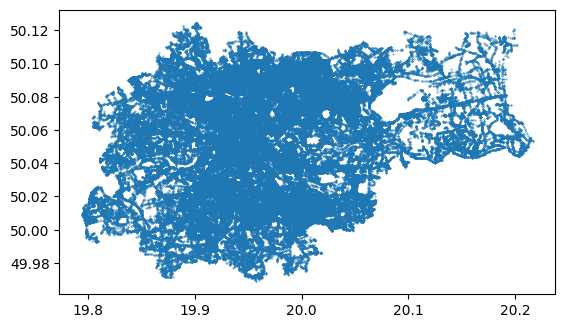

In [7]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,junction,service,access,width,bridge,tunnel,est_width,geometry
0,13822575,965423962,0,25042019,True,2,776,Kocmyrzowska,secondary,50,False,18.886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03277 50.08216)"
1,13822575,8284483157,0,148469683,False,2,NaN,Obrońców Krzyża,tertiary,50,True,8.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03249 50.08211)"
2,13822575,777395552,0,997754503,False,3,NaN,Obrońców Krzyża,tertiary,50,True,13.867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03270 50.08196)"
3,13822576,1234198750,0,2954554,False,NaN,NaN,Ignacego Mościckiego,residential,40,False,14.652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03435 50.08069, 20.03451 50.08078)"
4,13822576,5339146823,0,553072298,False,2,NaN,Obrońców Krzyża,tertiary,50,True,24.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03435 50.08069, 20.03413 50.08086)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721623,11286442326,5773366079,0,1218055223,False,NaN,NaN,NaN,footway,NaN,False,14.989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (19.96076 50.06312, 19.96077 50.06299)"
721624,11286442326,1919699663,0,1218055223,False,NaN,NaN,NaN,footway,NaN,True,3.619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (19.96076 50.06312, 19.96075 50.06315)"
721625,11286442327,11286442303,0,609536558,False,NaN,NaN,NaN,footway,NaN,False,7.807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (19.96103 50.06314, 19.96104 50.06307)"
721626,11286442327,11286442326,0,609536558,False,NaN,NaN,NaN,footway,NaN,True,19.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (19.96103 50.06314, 19.96076 50.06312)"


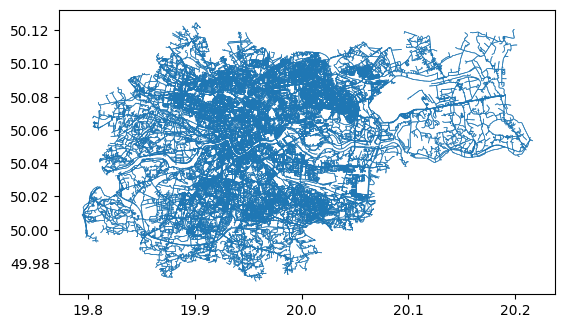

In [8]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

### Search for good osmid pairs

In [9]:
# Node 1 - zakamycze
node_nr_1 = 356926768
gdf_nodes[gdf_nodes["osmid"] == node_nr_1]

,osmid,y,x,street_count,highway,ref,geometry
19027,356926768,50.060711,19.838658,2,NaN,NaN,POINT (19.83866 50.06071)


In [10]:
# Node 2 - betel
node_nr_2 = 2104495834
gdf_nodes[gdf_nodes["osmid"] == node_nr_2]

,osmid,y,x,street_count,highway,ref,geometry
78191,2104495834,50.063631,19.934842,3,NaN,NaN,POINT (19.93484 50.06363)


In [11]:
# two random osmid
start_and_finish = gdf_nodes.sample(2)

osmid_1 = start_and_finish.iloc[0]["osmid"]
osmid_2 = start_and_finish.iloc[1]["osmid"]

coords_1 = start_and_finish.iloc[0]["y"], start_and_finish.iloc[0]["x"]
coords_2 = start_and_finish.iloc[1]["y"], start_and_finish.iloc[1]["x"]

print(f"osmid_1: {osmid_1}, osmid_2: {osmid_2}, distance: {geopy.distance.distance(coords_1, coords_2).km} km")

osmid_1: 1924205909, osmid_2: 11098530035, distance: 5.788148236128053 km


## Neo4j Import

In [12]:
NEO4J_URI = "bolt://localhost:7690"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "graph-routing"
NEO4J_DATABASE = "neo4j"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD), database=NEO4J_DATABASE)

In [13]:
clear_data_query = "MATCH (n) DETACH DELETE n"

clear_indexes_and_constrains = "CALL apoc.schema.assert({},{},true) YIELD label, key RETURN *"

# neo4j 4.0: "CREATE CONSTRAINT IF NOT EXISTS ON (i:Intersection) ASSERT i.osmid IS UNIQUE"
constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query =  "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

# neo4j 4.0: "CREATE CONSTRAINT IF NOT EXISTS ON (a:Address) ASSERT a.id IS UNIQUE"
address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.latitude = row.y, 
            i.longitude = row.x
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.name = road.name,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

# redundant data

# node_query = '''
#     UNWIND $rows AS row
#     WITH row WHERE row.osmid IS NOT NULL
#     MERGE (i:Intersection {osmid: row.osmid})
#         SET i.location = 
#          point({latitude: row.y, longitude: row.x }),
#             i.ref = row.ref,
#             i.highway = row.highway,
#             i.street_count = toInteger(row.street_count)
#     RETURN COUNT(*) as total
#     '''

# rels_query = '''
#     UNWIND $rows AS road
#     MATCH (u:Intersection {osmid: road.u})
#     MATCH (v:Intersection {osmid: road.v})
#     MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
#         SET r.oneway = road.oneway,
#             r.lanes = road.lanes,
#             r.ref = road.ref,
#             r.name = road.name,
#             r.length = toFloat(road.length)
#     RETURN COUNT(*) AS total
#     '''

In [14]:
def delete_database(tx):
    results = tx.run(clear_data_query)
    print(results)

def clear_indexes(tx):
    results = tx.run(clear_indexes_and_constrains)
    print(results)

In [15]:
def create_constraints(tx):
    results = tx.run(constraint_query)
    print(results)
    
    # results = tx.run(rel_index_query)
    # print(results)
    
    results = tx.run(address_constraint_query)
    print(results)
    
    # results = tx.run(point_index_query)
    # print(results)

In [16]:
def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {"rows": rows[batch * batch_size:(batch + 1) * batch_size].to_dict("records")}).data()
        print(results)
        total += results[0]["total"]
        batch += 1

### Clear database

In [17]:
# with driver.session() as session:
#     session.execute_write(delete_database)  # TODO: big database
    
# with driver.session() as session:
#     session.execute_write(clear_indexes)

### Create constraints

In [18]:
with driver.session() as session:
    session.execute_write(create_constraints)

### Load data

In [19]:
with driver.session() as session:
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=["geometry"])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3120}]


In [20]:
with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=["geometry"])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 1

### Simple search path query

```
MATCH (source:Intersection {osmid: 356926768}) 
MATCH (target:Intersection {osmid: 2104495834})
CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
YIELD path, weight
RETURN path, weight
```

```
MATCH (source:Intersection {osmid: 356926768}) 
MATCH (target:Intersection {osmid: 2104495834})
CALL apoc.algo.aStar(source, target, "", {weight: "length", x: "latitude", y: "longitude"})
YIELD path, weight
RETURN path, weight
```

not present in that apoc version

```
MATCH (source:Intersection {osmid: 356926768}) 
MATCH (target:Intersection {osmid: 2104495834})
CALL apoc.algo.aStarWithPoint(source, target, "", "length", "location")
YIELD path, weight
RETURN path, weight
```

```
MATCH (source:Intersection {osmid: 356926768}) 
MATCH (target:Intersection {osmid: 2104495834})
CALL apoc.algo.aStarConfig(source, target, "", 
{weight: "length", pointPropName: "location"})
YIELD path, weight
RETURN path, weight
```

In [56]:
def dijkstra_query(tx, osmid_1, osmid_2):
    dijkstra_query = f"""
        MATCH (source:Intersection {{osmid: {osmid_1}}}) 
        MATCH (target:Intersection {{osmid: {osmid_2}}})
        CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
        YIELD path, weight
        RETURN path, weight
        """
    results = tx.run(dijkstra_query)

    print(results.keys())
    print(results.values())

In [57]:
with driver.session() as session:
    session.execute_write(dijkstra_query, node_nr_1, node_nr_2)

['path', 'weight']
[[<Path start=<Node element_id='4:72af26a5-326b-4f9b-ad24-e33bf1c74118:19027' labels=frozenset({'Intersection'}) properties={'ref': nan, 'location': POINT(19.8386575 50.0607108), 'highway': nan, 'street_count': 2, 'osmid': 356926768}> end=<Node element_id='4:72af26a5-326b-4f9b-ad24-e33bf1c74118:78191' labels=frozenset({'Intersection'}) properties={'ref': nan, 'location': POINT(19.9348424 50.0636309), 'highway': nan, 'street_count': 3, 'osmid': 2104495834}> size=297>, 7793.594000000004]]


### Add addresses - TODO

In [ ]:
# We'll use apoc.load.json to import a JSON file of address data

add_addresses_query = """
CALL apoc.periodic.iterate(
  'CALL apoc.load.json("/home/pcend/Piotr/kod/lisboa-routing/data/lisboa.geojson") YIELD value',
  'MERGE (a:Address {id: value.properties.id})
SET a.location = 
  point(
      {latitude: value.geometry.coordinates[1], longitude: value.geometry.coordinates[0]}),
    a.full_address = value.properties.number + " " + value.properties.street + " " + value.properties.city + ", CA " + value.properties.postcode

SET a += value.properties',
  {batchSize:10000, parallel:true})
"""

# Next, connect each address to the road network at the nearest intersection

near_intersection_query = """
CALL apoc.periodic.iterate(
  'MATCH (p:Address) WHERE NOT EXISTS ((p)-[:NEAREST_INTERSECTION]->(:Intersection)) RETURN p',
  'CALL {
  WITH p
  MATCH (i:Intersection)
  USING INDEX i:Intersection(location)
  WHERE point.distance(i.location, p.location) < 200

  WITH i
  ORDER BY point.distance(p.location, i.location) ASC 
  LIMIT 1
  RETURN i
}
WITH p, i

MERGE (p)-[r:NEAREST_INTERSECTION]->(i)
SET r.length = point.distance(p.location, i.location)
RETURN COUNT(p)',
  {batchSize:1000, parallel:false})
"""

# Create a full text index to enable search in our web app

full_text_query = "CREATE FULLTEXT INDEX search_index IF NOT EXISTS FOR (p:PointOfInterest|Address) ON EACH [p.name, p.full_address]"

In [ ]:
def enrich_addresses(tx):
    results = tx.run(add_addresses_query)        
    results = tx.run(near_intersection_query)


In [ ]:
# with driver.session() as session:
#     session.execute_write(enrich_addresses)

In [ ]:
# with driver.session() as session:
#     results = session.execute_write(lambda tx: tx.run(full_text_query))


### Query with address

```
MATCH (a:Address)-[:NEAREST_INTERSECTION]->(source:Intersection)
WHERE a.full_address CONTAINS "410 E 5TH AVE SAN MATEO, CA"
MATCH 
  (poi:Address)-[:NEAREST_INTERSECTION]->(dest:Intersection) 
WHERE poi.full_address CONTAINS "111 5TH AVE"
CALL apoc.algo.dijkstra(source, dest, "ROAD_SEGMENT", "length") 
YIELD weight, path
RETURN *
//WITH [ x in nodes(path) | {latitude: x.location.latitude, longitude: x.location.longitude}] AS route, weight AS totalDist
//RETURN *
```


```
CALL db.index.fulltext.queryNodes("search_index", $searchString) 
YIELD node, score
RETURN coalesce(node.name, node.full_address) AS value, score, labels(node)[0] AS label, node.id AS id
ORDER BY score DESC LIMIT 25
```

```
MATCH (to {id: $dest})-[:NEAREST_INTERSECTION]->(source:Intersection) 
MATCH (from {id: $source})-[:NEAREST_INTERSECTION]->(target:Intersection)
CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
YIELD path, weight
RETURN [n in nodes(path) | [n.location.latitude, n.location.longitude]] AS route
```
